이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [3]:
df_train = pd.read_csv('/content/sample_data/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/sample_data/fashion-mnist_test.csv')

###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

####Train dataset

In [4]:
#요약
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [5]:
#모양
df_train.shape

(60000, 785)

In [6]:
#크기
df_train.size

47100000

In [7]:
#결측치 여부
if np.sum(df_train.isnull().sum()) == 0:
  print('결측치 없음')
else:
  print('결측치 있음')

결측치 없음


####Test dataset

In [8]:
#요약
df_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [9]:
#모양
df_test.shape

(10000, 785)

In [10]:
#크기
df_test.size

7850000

In [11]:
#결측치 여부
if np.sum(df_test.isnull().sum()) == 0:
  print('결측치 없음')
else:
  print('결측치 있음')

결측치 없음


### Data중 첫 번째 이미지를 보여주세요.

#### Train

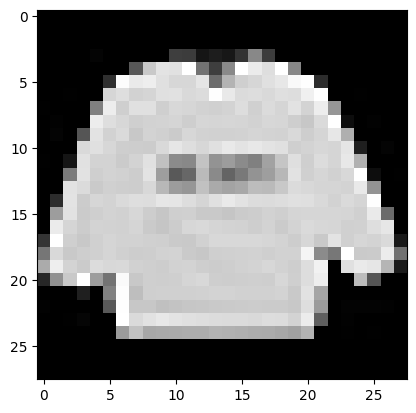

In [12]:
pixel = df_train.iloc[0, 1:].values  # 레이블을 제외한 모든 픽셀 값
image = pixel.reshape(28, 28)  # 28x28 배열로 변환
plt.imshow(image, cmap='gray')  # 시각화

#### Test

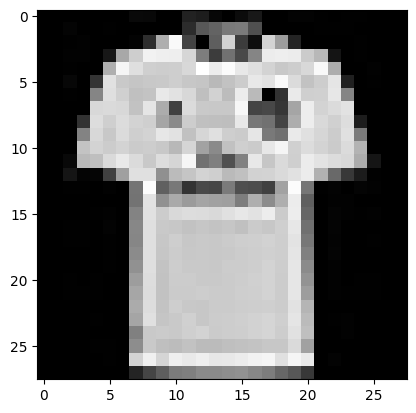

In [13]:
pixel2 = df_test.iloc[0, 1:].values  # 레이블을 제외한 모든 픽셀 값
image2 = pixel2.reshape(28, 28)  # 28x28 배열로 변환
plt.imshow(image2, cmap='gray')  # 시각화

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

In [14]:
train_lab = df_train['label'].values
train_img = df_train.drop(columns=['label']).values

In [15]:
train_tens = torch.tensor(train_img, dtype=torch.float32)

In [16]:
test_lab = df_test['label'].values
test_img = df_test.drop(columns=['label']).values

In [17]:
test_tens = torch.tensor(test_img, dtype=torch.float32)

### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [18]:
# MinMaxScaler 객체
scaler = MinMaxScaler()

train_tens_np = train_tens.numpy()
test_tens_np = test_tens.numpy()

normal_train = scaler.fit_transform(train_tens_np)
normal_test = scaler.transform(test_tens_np)

# 정규화된 데이터를 다시 텐서로 변환
train_tens = torch.tensor(normal_train, dtype=torch.float32)
test_tens = torch.tensor(normal_test, dtype=torch.float32)

### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

In [19]:
# 데이터 결합
df_tens = torch.cat((train_tens, test_tens), dim=0)
df_lab = np.concatenate((train_lab, test_lab), axis=0)

In [20]:
df_tens.shape

torch.Size([70000, 784])

# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

*   PCA : 선형 차원 축소 기법으로, 데이터의 분산이 가장 큰 방향으로 새로운 축을 정의하여 고차원 데이터를 저차원으로 변환한다. 분산이 큰 방향에 대해서는 데이터의 주요 정보나 패턴이 포함되어 있다.
*   t-SNE : 비선형 차원 축소 기법으로, 고차원 데이터를 저차원 공간으로 변환하는 과정에서 포인트 간의 거리 or 유사성을 그대로 보존한다. 시각화를 위해 사용된다.

t-sne 설명 : https://velog.io/@swan9405/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-T-SNE-T-distributed-Stochastic-Neighbor-Embedding

## PCA

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [21]:
pca = PCA(n_components=50)
pca.fit(df_tens)

pca_train = pca.transform(df_tens)

### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [22]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.29005582, 0.17748807, 0.06012299, 0.04971133, 0.03837594,
       0.03465566, 0.02344491, 0.0190567 , 0.01346402, 0.01312741,
       0.00991912, 0.009157  , 0.00767027, 0.00659116, 0.00610413,
       0.00589315, 0.00553029, 0.0052666 , 0.00459726, 0.00455698,
       0.00432973, 0.00405783, 0.00383849, 0.00373898, 0.003624  ,
       0.00350689, 0.00333854, 0.00318438, 0.00309646, 0.00294585,
       0.00275448, 0.00265749, 0.00263324, 0.0025753 , 0.00247502,
       0.00237117, 0.00230704, 0.00224367, 0.00219052, 0.00209516,
       0.00200246, 0.00196831, 0.00194588, 0.00182652, 0.001756  ,
       0.00171181, 0.00168242, 0.00164172, 0.00161927, 0.0015574 ])

### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [23]:
train_recons = pca.inverse_transform(pca_train)
df_tens_np = df_tens.numpy()
train_error = np.mean(np.square(df_tens_np - train_recons))

print(f"Reconstruction Error: {train_error}")

Reconstruction Error: 0.011958773749664904


### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [24]:
pca2 = PCA(n_components=30)
pca2.fit(df_tens)

pca_train2 = pca2.transform(df_tens)

In [25]:
var_ratio2 = pca2.explained_variance_ratio_
var_ratio2

array([0.29005582, 0.17748807, 0.06012299, 0.04971133, 0.03837594,
       0.03465566, 0.02344491, 0.0190567 , 0.01346402, 0.01312741,
       0.00991912, 0.009157  , 0.00767027, 0.00659116, 0.00610413,
       0.00589315, 0.00553029, 0.0052666 , 0.00459726, 0.00455698,
       0.00432973, 0.00405783, 0.00383849, 0.00373898, 0.003624  ,
       0.00350689, 0.00333854, 0.00318438, 0.00309646, 0.00294585])

In [26]:
train_recons2 = pca2.inverse_transform(pca_train2)
df_tens_np2 = df_tens.numpy()
train_error2 = np.mean(np.square(df_tens_np2 - train_recons2))

print(f"Reconstruction Error: {train_error2}")

Reconstruction Error: 0.015611996049604726


### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

50차원으로 줄였을 때가 더 적은 오차를 가진다.

### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [27]:
pca3 = PCA(n_components=2)
pca3.fit(df_tens)

pca_train3 = pca3.transform(df_tens)

In [28]:
var_ratio3 = pca3.explained_variance_ratio_
var_ratio3

array([0.29005582, 0.17748807])

In [29]:
train_recons3 = pca3.inverse_transform(pca_train3)
df_tens_np3 = df_tens.numpy()
train_error3 = np.mean(np.square(df_tens_np3 - train_recons3))

print(f"Reconstruction Error: {train_error3}")

Reconstruction Error: 0.04629741634308041


### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

<ipython-input-30-ac575803a895>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(labels))


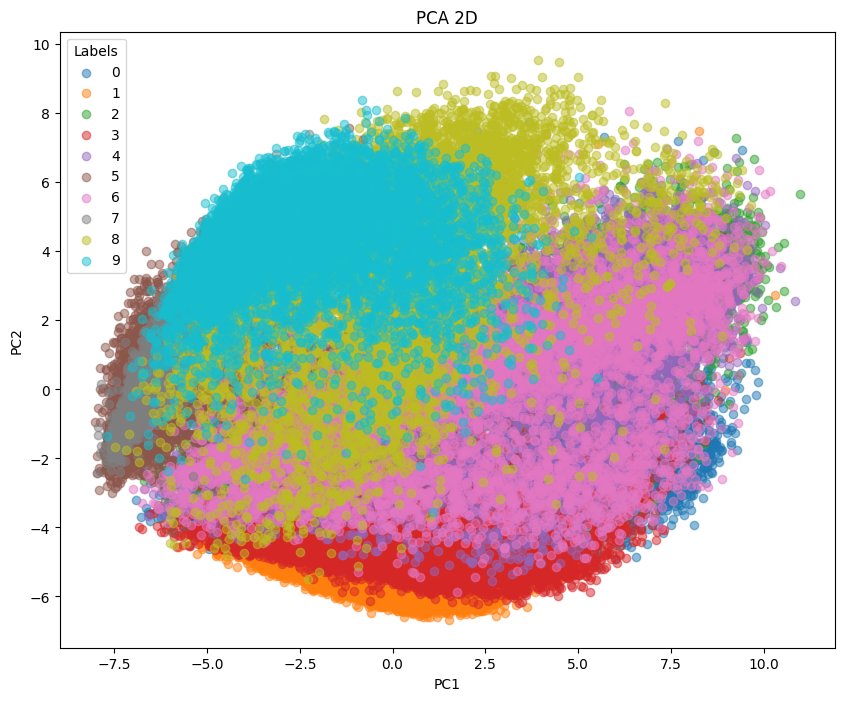

In [30]:
labels = set(df_lab)
colors = plt.cm.get_cmap('tab10', len(labels))


plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    plt.scatter(pca_train3[df_lab == label, 0], pca_train3[df_lab == label, 1],
                color=colors(i), label=label, alpha=0.5)

plt.title('PCA 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Labels')
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

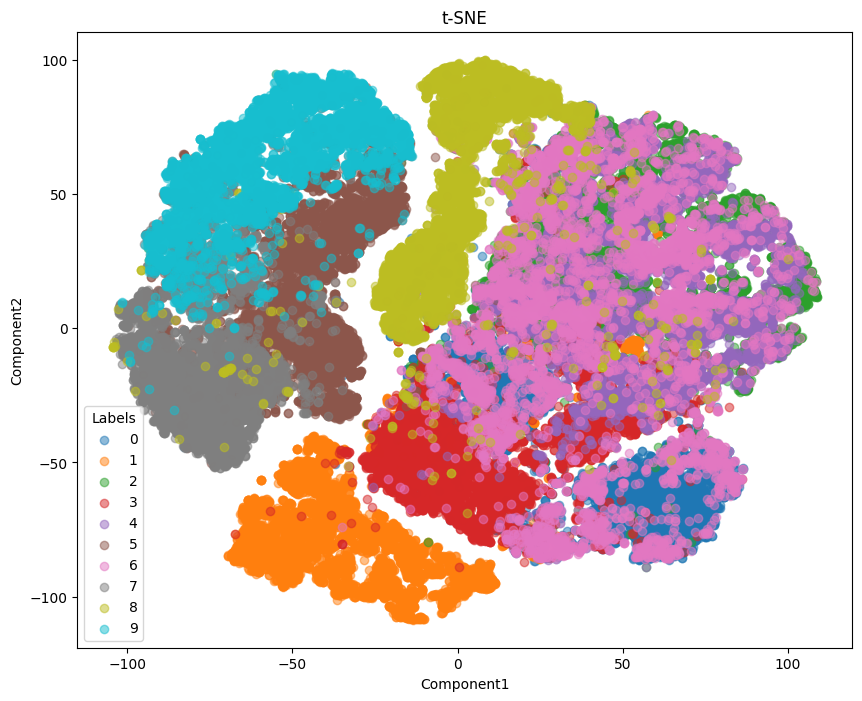

In [31]:
tsne = TSNE(random_state=42)
tsne_result = tsne.fit_transform(pca_train)

# 시각화
plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    plt.scatter(tsne_result[df_lab == label, 0], tsne_result[df_lab == label, 1],
                color=colors(i), label=label, alpha=0.5)

plt.title('t-SNE')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.legend(title='Labels')
plt.show()

### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

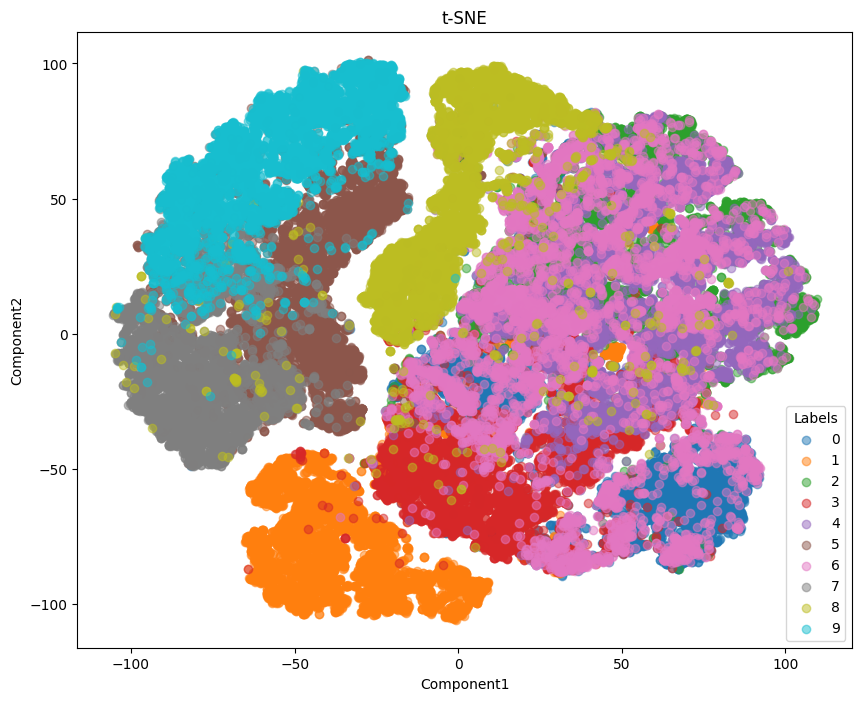

In [33]:
tsne = TSNE(random_state=42)
tsne_result = tsne.fit_transform(pca_train2)

# 시각화
plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    plt.scatter(tsne_result[df_lab == label, 0], tsne_result[df_lab == label, 1],
                color=colors(i), label=label, alpha=0.5)

plt.title('t-SNE')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.legend(title='Labels')
plt.show()

## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

In [34]:
dbscan = DBSCAN(eps=0.5, min_samples=1)
db_clus = dbscan.fit_predict(pca_train)

In [35]:
db_clus

array([    0,     1,     2, ..., 69872, 69873, 69874])

### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

In [36]:
km = KMeans(n_clusters=10, random_state=42)
km_clus = km.fit_predict(pca_train)

### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

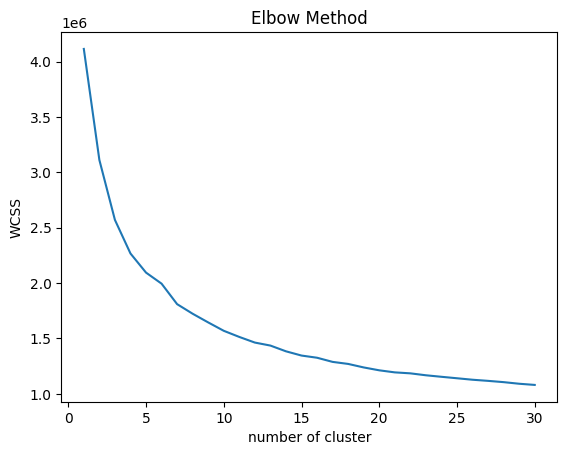

In [37]:
wcss = []
for i in range(1, 31):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(pca_train)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 31), wcss)
plt.title('Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')
plt.show()

### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

In [38]:
km2 = KMeans(n_clusters=6, random_state=42)
km_clus2 = km.fit_predict(pca_train)

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

#### 계층적 군집화(Hierachical clustering)

In [39]:
# 20000개 샘플링
pca_sample = pca_train[np.random.choice(pca_train.shape[0], 20000, replace=False)]

# 군집화 수행
hier = AgglomerativeClustering(n_clusters=10)
hier_clus = hier.fit_predict(pca_sample)

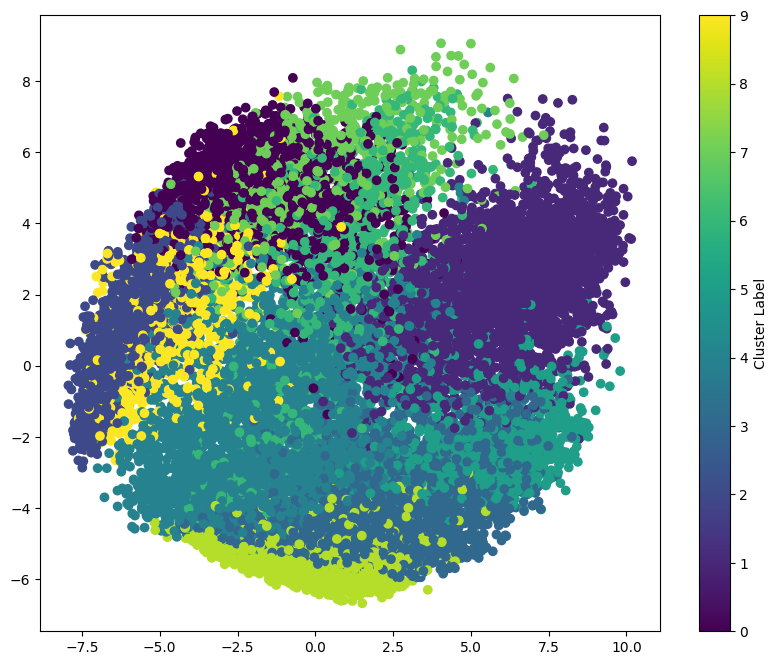

In [44]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_sample[:, 0], pca_sample[:, 1], c=hier_clus)
plt.colorbar(scatter, label='Cluster Label')
plt.show()

#### Gaussian Mixture Model

In [45]:
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(pca_train)

gmm_clus = gmm.predict(pca_train)

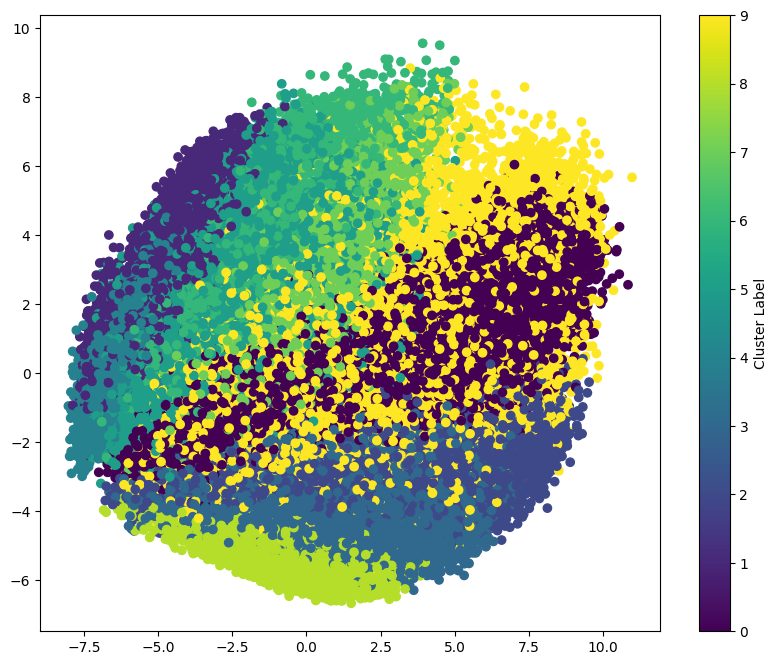

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=gmm_clus)
plt.colorbar(label='Cluster Label')
plt.show()

## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

In [47]:
kmeans_sil = silhouette_score(pca_train, km_clus2)
dbscan_sil = silhouette_score(pca_train, db_clus)
hier_sil = silhouette_score(pca_sample, hier_clus)
gmm_sil = silhouette_score(pca_train, gmm_clus)

In [48]:
print(f"K-means Score: {kmeans_sil}")
print(f"DBSCAN Score: {dbscan_sil}")
print(f"Hierachical Score: {hier_sil}")
print(f"GMM Score: {gmm_sil}")

K-means Score: 0.2016564108541841
DBSCAN Score: 0.0027752908765665296
Hierachical Score: 0.18831965712599794
GMM Score: 0.1034235828280244


#### 시각화

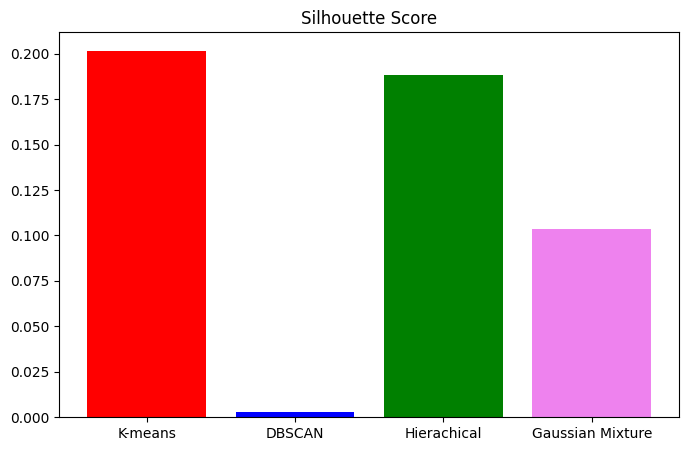

In [49]:
labels = ['K-means', 'DBSCAN', 'Hierachical', 'Gaussian Mixture']
scores = [kmeans_sil, dbscan_sil, hier_sil, gmm_sil]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['red', 'blue', 'green', 'violet'])
plt.title('Silhouette Score')
plt.show()

### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.

### 실루엣 점수 해석방법
*   1에 가까운 값: 데이터 포인트가 잘 군집화되어 있으며, 클러스터 간의 거리가 멀다는 것을 의미합니다. 군집화가 매우 잘 되었다고 평가할 수 있습니다.
*   0에 가까운 값: 데이터 포인트가 군집의 경계에 위치하거나, 군집이 겹치는 경우를 나타냅니다. 군집화가 잘 이루어지지 않았음을 시사합니다.
*   음수 값: 데이터 포인트가 잘못된 클러스터에 할당되었음을 나타냅니다. 이는 클러스터 간의 경계가 모호하다는 것을 의미합니다.

### k-means가 실루엣 점수가 제일 높으므로, 군집화 성능이 제일 좋다고 할 수 있다.